# Intro to Graph Algorithms

This notebook will describe some of the common graph algorithms that are used in SE and DS.

In [11]:
from typing import List, Dict, Tuple, Any, Optional, Callable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# 1. Breadth-first Search (BFS)

- It is a **traversal algorithm**.
- Starts at the **root** node and explores all the **neighbouring nodes** at a **particular level** before moving to the next level of nodes.
- Works by maintaining a **queue of nodes** to visit and marking each visited node as it is added to the queue.
- It is particularly useful for finding the **shortest path** between two nodes in an **unweighted graph**.
    * This is because the algorithm visits nodes **in order** of their **distance** from the *starting* node. So the first time the target node is visited, it must be along the shortest path from the starting node.
- It can also be used to check whether a graph is connected or to find all connected components of a graph.
- The time complexity of BFS is $O(|V| + |E|)$, which is a **significant issue** for graphs with a high degree of connectivity or for graphs that are sparse. Thus various variants of BFS are use such as:
    - Bi-directional BFS
    - $A^{*}$


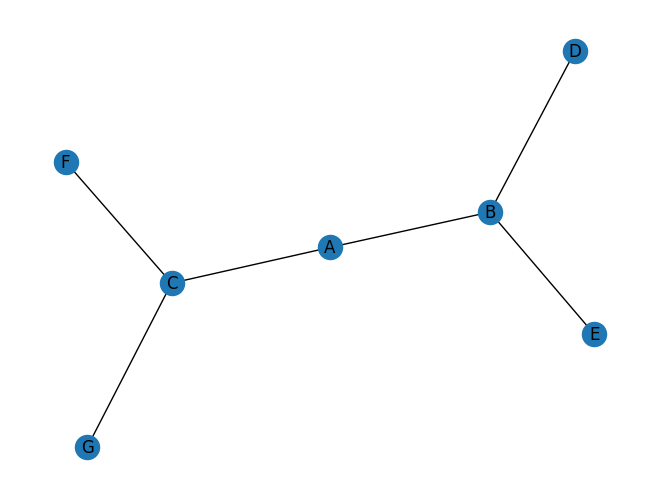

In [20]:
G = nx.Graph()
nodes = {"A", "B", "C", "D", "E", "F", "G"}
edges = [("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F"), ("C", "G")]
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

In [21]:
def bfs(graph: nx.Graph, node: str) -> List:
    """
    Performs the Breadth-first Search.
    
    :Parameters:
    ----------
    graph (nx.Graph) : The graph object which consists of nodes and edges.
    node (str): The starting node.

    :Returns:
    ---------
    The path for the starting and ending node.
    """
    visited = [node]
    queue = [node]

    while queue:
        node = queue.pop(0)

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    return visited
    

In [22]:
bfs(G, "A")

['A', 'B', 'C', 'D', 'E', 'F', 'G']

# 2. Depth-first Search (DFS)

- It is a **recursive algorithm** that starts at the **root node** and explores as far as possible along each branch before backtracking.
- It is useful for solving various problems, such as:
    - Finding cycles in a graph
    - Finding connected components
    - Topological sorting
    - Solving maze problem
- Like BFS it has a time complexity of $(O(|V| + |E|))$, where $|V|$ is the number of nodes and $|E|$ is the number of edges.
- It requires less memory but doesn't gurantee the shallowest path solution.
- Unlike BFS, the algorithm can trap itself in an **infinite loop**.

In [29]:
visited = list()

def dfs(visited: List, graph: nx.Graph, node: str):
    """
    Performs the Depth-First Search

    :Parameters:
    ------------
    visited (list): The list of visited nodes.
    graph (nx.Graph): the graph object consisting of nodes and edges.
    node (str): the starting node.
    """
    if node not in visited:
        visited.append(node)

        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)

    return visited

In [30]:
dfs(visited, G, "A")

['A', 'B', 'D', 'E', 'C', 'F', 'G']